In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [4]:
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)
#1.获取数据集个数
train_nums = mnist.train.num_examples
validation_nums = mnist.validation.num_examples
test_nums = mnist.test.num_examples
print("train_nums: %d,validation_nums:%d,test_nums:%d" % (train_nums,validation_nums,test_nums))

Extracting MNIST_data\train-images-idx3-ubyte.gz


Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


train_nums: 55000,validation_nums:5000,test_nums:10000


In [5]:
#2.获取数据值
train_data = mnist.train.images
val_data = mnist.validation.images
test_data = mnist.test.images
print("训练集数据大小：",train_data.shape)
print("一张图片的特征:",train_data.shape[1])
#3.获取标签值
train_labels = mnist.train.labels
validation_labels = mnist.validation.labels
test_labels = mnist.test.labels
print("训练集标签大小：",train_labels.shape)
print("标签值大小：",train_labels.shape[1])

训练集数据大小： (55000, 784)
一张图片的特征: 784
训练集标签大小： (55000, 10)
标签值大小： 10


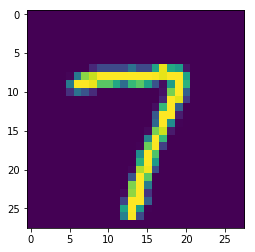

In [4]:
#测试图片
from matplotlib.pyplot import imshow
%matplotlib inline
image_arr = train_data[100].reshape((28,28))
imshow(image_arr)

In [5]:
x = tf.placeholder(dtype=tf.float32,shape=[None,784])
y = tf.placeholder(dtype=tf.float32,shape=[None,10])
x_image = tf.reshape(x,shape = [-1,28,28,1])
#构建计算图
#输入[None,28,28,1]  输出：[None,24,24,6]
conv1 = tf.layers.conv2d(x_image,6,
                         kernel_size=(5,5),
                         strides=(1,1),
                         padding="valid",
                         activation=tf.nn.relu,
                         name="conv1")
#输入：[None,24,24,6] 输出：[None,12,12,6]
pool1 = tf.layers.average_pooling2d(conv1,
                                    pool_size=(2,2),
                                    strides=(2,2),
                                    name="avg_pooling1")
#输入：[None,12,12,6] 输出：[NOne,8,8,16]
conv2 = tf.layers.conv2d(pool1,filters=16,
                         kernel_size=(5,5),
                         strides=(1,1),
                         activation=tf.nn.relu,
                         name="conv2")
#输入：[None,8,8,16] 输出：[NOne,4,4,16]
pool2 = tf.layers.average_pooling2d(conv2,
                                    pool_size=(2,2),
                                    strides=(2,2),
                                    name="avg_pooling2")
#输入：4*4*16 = 256 
flatten = tf.contrib.layers.flatten(pool2)
#全连接层 120个神经元
fc1 = tf.layers.dense(flatten,120,tf.nn.relu)
#全连接层 84个神经元
fc2 = tf.layers.dense(fc1,84,tf.nn.relu)
#输出层
y_ = tf.layers.dense(fc2,10)

# 计算损失
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=y_))

#利用梯度下降优化
train_op = tf.train.AdamOptimizer(0.001).minimize(loss)
# 计算准确率
equal_list = tf.equal(tf.argmax(y_,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(equal_list,tf.float32))

In [6]:
import numpy as np
batch_size = 20
train_steps = 10000
test_steps = 500
init_op = tf.global_variables_initializer()
with tf.Session()as sess:
    sess.run(init_op)
    for i in range(train_steps):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        loss_val,acc_val,_ = sess.run([loss,accuracy,train_op],feed_dict={x:batch_x,y:batch_y})
        if (i+1) % 500 == 0:
            print ('[Train] Step: %d, loss: %4.5f, acc: %4.5f' % (i+1, loss_val,acc_val))
        if(i+1) % 5000 == 0:
            all_test_acc_val = []
            for j in range(test_steps):
                test_x,test_y = mnist.test.next_batch(batch_size)
                acc_val = sess.run(accuracy,feed_dict={x:test_x,y:test_y})
                all_test_acc_val.append(acc_val)
            test_acc = np.mean(all_test_acc_val)
            print ('[Test ] Step: %d, acc: %4.5f' % (i+1, test_acc))  
                

[Train] Step: 500, loss: 0.30442, acc: 0.85000


[Train] Step: 1000, loss: 0.27377, acc: 0.90000


[Train] Step: 1500, loss: 0.02586, acc: 1.00000


[Train] Step: 2000, loss: 0.33328, acc: 0.90000


[Train] Step: 2500, loss: 0.10996, acc: 0.95000


[Train] Step: 3000, loss: 0.00909, acc: 1.00000


[Train] Step: 3500, loss: 0.10166, acc: 1.00000


[Train] Step: 4000, loss: 0.00306, acc: 1.00000


[Train] Step: 4500, loss: 0.11304, acc: 0.95000


[Train] Step: 5000, loss: 0.11628, acc: 0.95000


[Test ] Step: 5000, acc: 0.97890


[Train] Step: 5500, loss: 0.39822, acc: 0.95000


[Train] Step: 6000, loss: 0.07731, acc: 0.95000


[Train] Step: 6500, loss: 0.01127, acc: 1.00000


[Train] Step: 7000, loss: 0.00252, acc: 1.00000


[Train] Step: 7500, loss: 0.00178, acc: 1.00000


[Train] Step: 8000, loss: 0.00618, acc: 1.00000


[Train] Step: 8500, loss: 0.00311, acc: 1.00000


[Train] Step: 9000, loss: 0.00912, acc: 1.00000


[Train] Step: 9500, loss: 0.00680, acc: 1.00000


[Train] Step: 10000, loss: 0.00758, acc: 1.00000


[Test ] Step: 10000, acc: 0.98390
